In [75]:
import pandas as pd
data = pd.read_csv("Cancer_Data.csv")
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


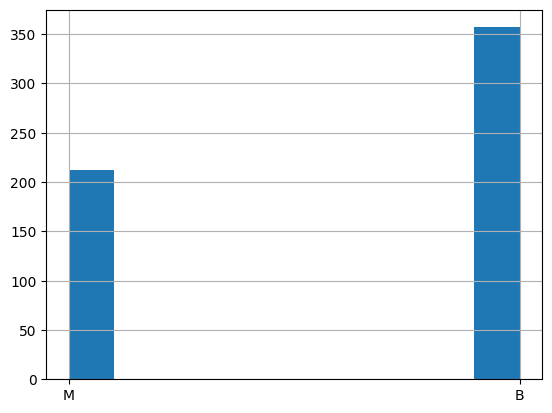

In [76]:
import matplotlib.pyplot as plt
data["diagnosis"].hist(bins=10)
plt.show()

In [77]:
data["diagnosis"].replace('M' , '1',inplace=True)
data["diagnosis"].replace('B' , '0',inplace=True)
data.head()   

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
correlations = data.corr()
correlations['diagnosis']

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

In [79]:
# data.drop(columns=['Unnamed: 32' , 'symmetry_se' , 'texture_se' , 'id'] , inplace=True)
# data.head()
data.drop(columns=['Unnamed: 32' ,'id'] , inplace=True)

In [80]:
from sklearn.model_selection import train_test_split

y = data.values[: , 0]
x = data.values[: , 1:28]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
from sklearn.metrics import accuracy_score

def calAccuracy(y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred) * 100
    return accuracy

In [83]:
import numpy as np
sample = np.array([13.73,22.61,93.6,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943])
y_pred = model.predict(sample.reshape(1, -1))
print(y_pred)

['0']


In [84]:
y_pred = model.predict(x_test)
accuracy = calAccuracy(y_test , y_pred)
print(accuracy)

92.98245614035088
